In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
plt.style.use('ggplot')
sns.set_palette('Set2')

In [24]:
# 1. Загрузка данных
# Предполагается, что файл clinical.tsv находится в той же директории
df = pd.read_csv('clinical.tsv', sep='\t')

In [25]:
# 2. Общая информация о данных
print("=== Общая информация о данных ===")
print(f"Количество записей: {len(df)}")
print(f"Количество столбцов: {len(df.columns)}")
print("\nИнформация о столбцах:")
print(df.info())

=== Общая информация о данных ===
Количество записей: 14
Количество столбцов: 500

Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Columns: 500 entries, attrib_name to TCGA.ZG.A9NI
dtypes: object(500)
memory usage: 54.8+ KB
None


In [26]:
# 3. Пропущенные значения
print("\n=== Пропущенные значения ===")
missing_data = df.isna().sum()
missing_percentage = (missing_data / len(df) * 100).round(2)
missing_summary = pd.DataFrame({'Пропущено': missing_data, 'Процент': missing_percentage})
print(missing_summary[missing_summary['Пропущено'] > 0])


=== Пропущенные значения ===
              Пропущено  Процент
TCGA.CH.5753          1     7.14
TCGA.CH.5764          1     7.14
TCGA.EJ.7312          2    14.29
TCGA.EJ.7325          2    14.29
TCGA.EJ.A46B          2    14.29
...                 ...      ...
TCGA.ZG.A9M4          2    14.29
TCGA.ZG.A9MC          2    14.29
TCGA.ZG.A9N3          2    14.29
TCGA.ZG.A9ND          2    14.29
TCGA.ZG.A9NI          2    14.29

[386 rows x 2 columns]


In [34]:
print("Столбцы в DataFrame:", df.columns.tolist())

Столбцы в DataFrame: ['attrib_name', 'TCGA.CH.5753', 'TCGA.CH.5763', 'TCGA.CH.5764', 'TCGA.CH.5772', 'TCGA.CH.5790', 'TCGA.CH.5791', 'TCGA.EJ.5542', 'TCGA.EJ.7123', 'TCGA.EJ.7312', 'TCGA.EJ.7325', 'TCGA.EJ.7791', 'TCGA.EJ.A46B', 'TCGA.EJ.A46G', 'TCGA.EJ.A65J', 'TCGA.EJ.A6RC', 'TCGA.G9.6364', 'TCGA.HC.7233', 'TCGA.HC.7748', 'TCGA.HC.7821', 'TCGA.HC.A6AQ', 'TCGA.HC.A76W', 'TCGA.J4.A83N', 'TCGA.J9.A8CN', 'TCGA.KC.A7FA', 'TCGA.KK.A7AP', 'TCGA.KK.A7B3', 'TCGA.KK.A7B4', 'TCGA.KK.A8IB', 'TCGA.QU.A6IM', 'TCGA.XK.AAJ3', 'TCGA.XK.AAK1', 'TCGA.2A.A8VL', 'TCGA.2A.A8VO', 'TCGA.2A.A8VT', 'TCGA.2A.A8VV', 'TCGA.2A.A8VX', 'TCGA.2A.A8W1', 'TCGA.2A.A8W3', 'TCGA.2A.AAYF', 'TCGA.2A.AAYO', 'TCGA.2A.AAYU', 'TCGA.4L.AA1F', 'TCGA.CH.5737', 'TCGA.CH.5738', 'TCGA.CH.5739', 'TCGA.CH.5740', 'TCGA.CH.5741', 'TCGA.CH.5743', 'TCGA.CH.5744', 'TCGA.CH.5745', 'TCGA.CH.5746', 'TCGA.CH.5748', 'TCGA.CH.5750', 'TCGA.CH.5751', 'TCGA.CH.5752', 'TCGA.CH.5754', 'TCGA.CH.5761', 'TCGA.CH.5762', 'TCGA.CH.5765', 'TCGA.CH.5766', 'TC

In [37]:
# 4. Преобразование типов данных для числовых столбцов
numeric_cols = ['years_to_birth', 'Tumor_purity', 'number_of_lymph_nodes', 'overall_survival']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Преобразуем в числа, NA остаются NA

In [38]:
# 5. Общая информация о данных
print("\n=== Общая информация о данных ===")
print(f"Количество записей: {len(df)}")
print(f"Количество столбцов: {len(df.columns)}")
print("\nИнформация о столбцах:")
print(df.info())


=== Общая информация о данных ===
Количество записей: 14
Количество столбцов: 500

Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Columns: 500 entries, attrib_name to TCGA.ZG.A9NI
dtypes: object(500)
memory usage: 54.8+ KB
None


In [39]:
# 6. Пропущенные значения
print("\n=== Пропущенные значения ===")
missing_data = df.isna().sum()
missing_percentage = (missing_data / len(df) * 100).round(2)
missing_summary = pd.DataFrame({'Пропущено': missing_data, 'Процент': missing_percentage})
print(missing_summary[missing_summary['Пропущено'] > 0])


=== Пропущенные значения ===
              Пропущено  Процент
TCGA.CH.5753          1     7.14
TCGA.CH.5764          1     7.14
TCGA.EJ.7312          2    14.29
TCGA.EJ.7325          2    14.29
TCGA.EJ.A46B          2    14.29
...                 ...      ...
TCGA.ZG.A9M4          2    14.29
TCGA.ZG.A9MC          2    14.29
TCGA.ZG.A9N3          2    14.29
TCGA.ZG.A9ND          2    14.29
TCGA.ZG.A9NI          2    14.29

[386 rows x 2 columns]


In [40]:
# 7. Описательная статистика числовых переменных
print("\n=== Описательная статистика числовых переменных ===")
available_numeric_cols = [col for col in numeric_cols if col in df.columns]
if available_numeric_cols:
    print(df[available_numeric_cols].describe())
else:
    print("Числовые столбцы не найдены. Проверьте имена столбцов.")


=== Описательная статистика числовых переменных ===
Числовые столбцы не найдены. Проверьте имена столбцов.


In [41]:
# 8. Описательная статистика категориальных переменных
categorical_cols = ['pathology_T_stage', 'pathology_N_stage', 'histological_type',
                    'gender', 'radiation_therapy', 'residual_tumor', 'race', 'ethnicity', 'status']
print("\n=== Распределение категориальных переменных ===")
available_categorical_cols = [col for col in categorical_cols if col in df.columns]
for col in available_categorical_cols:
    print(f"\nРаспределение для {col}:")
    print(df[col].value_counts(dropna=False))


=== Распределение категориальных переменных ===


In [48]:
SAVE_PLOTS = True

In [49]:
if not os.path.exists('plots'):
    os.makedirs('plots')

In [50]:
os.makedirs('plots', exist_ok=True)  # exist_ok=True предотвращает ошибку, если папка уже существует

In [58]:
pip install pandas numpy matplotlib seaborn

In [59]:
# Загрузка и транспонирование данных
try:
    df = pd.read_csv('clinical.tsv', sep='\t')
    df = df.set_index('attrib_name').T.reset_index()
    df = df.rename(columns={'index': 'patient_id'})
    # Преобразование числовых столбцов
    numeric_cols = ['years_to_birth', 'Tumor_purity', 'number_of_lymph_nodes', 'overall_survival']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
except FileNotFoundError:
    print("Ошибка: Файл 'clinical.tsv' не найден. Убедитесь, что файл находится в той же директории, что и скрипт.")
    exit()

In [60]:
# Диагностика: проверяем наличие столбцов и данных
print("Доступные столбцы в DataFrame:", df.columns.tolist())
for col in ['years_to_birth', 'Tumor_purity', 'overall_survival', 'pathology_T_stage', 'pathology_N_stage']:
    if col in df.columns:
        print(f"Количество непропущенных значений в {col}: {df[col].notna().sum()}")

Доступные столбцы в DataFrame: ['patient_id', 'years_to_birth', 'Tumor_purity', 'pathology_T_stage', 'pathology_N_stage', 'histological_type', 'number_of_lymph_nodes', 'gender', 'radiation_therapy', 'residual_tumor', 'race', 'ethnicity', 'overall_survival', 'status', 'overallsurvival']
Количество непропущенных значений в years_to_birth: 488
Количество непропущенных значений в Tumor_purity: 497
Количество непропущенных значений в overall_survival: 496
Количество непропущенных значений в pathology_T_stage: 492
Количество непропущенных значений в pathology_N_stage: 426


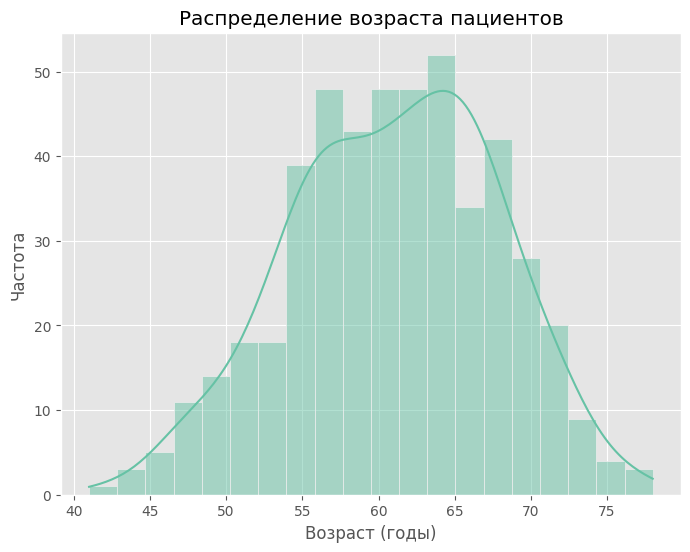

In [61]:
# Визуализации
# 9.1. Гистограмма возраста
if 'years_to_birth' in df.columns and df['years_to_birth'].notna().sum() > 0:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['years_to_birth'].dropna(), bins=20, kde=True) if 'sns' in globals() else plt.hist(df['years_to_birth'].dropna(), bins=20)
    plt.title('Распределение возраста пациентов')
    plt.xlabel('Возраст (годы)')
    plt.ylabel('Частота')
    plt.show()
    plt.close()
else:
    print("Пропуск гистограммы возраста: столбец 'years_to_birth' отсутствует или пустой")

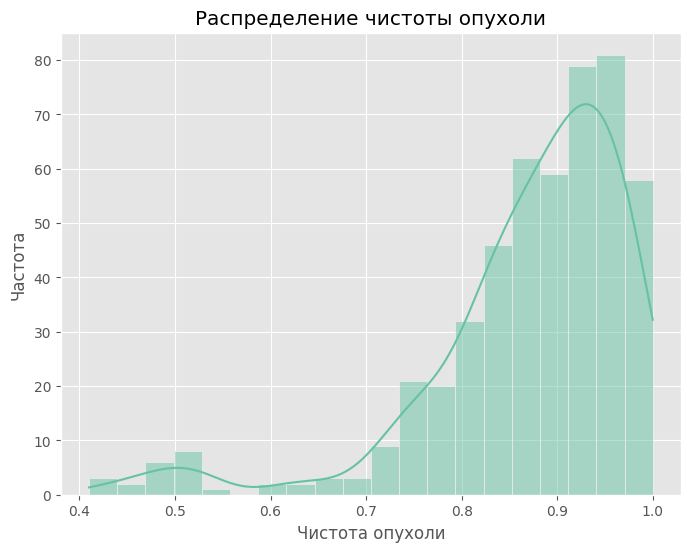

In [62]:
# 9.2. Гистограмма чистоты опухоли
if 'Tumor_purity' in df.columns and df['Tumor_purity'].notna().sum() > 0:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Tumor_purity'].dropna(), bins=20, kde=True) if 'sns' in globals() else plt.hist(df['Tumor_purity'].dropna(), bins=20)
    plt.title('Распределение чистоты опухоли')
    plt.xlabel('Чистота опухоли')
    plt.ylabel('Частота')
    plt.show()
    plt.close()
else:
    print("Пропуск гистограммы чистоты опухоли: столбец 'Tumor_purity' отсутствует или пустой")


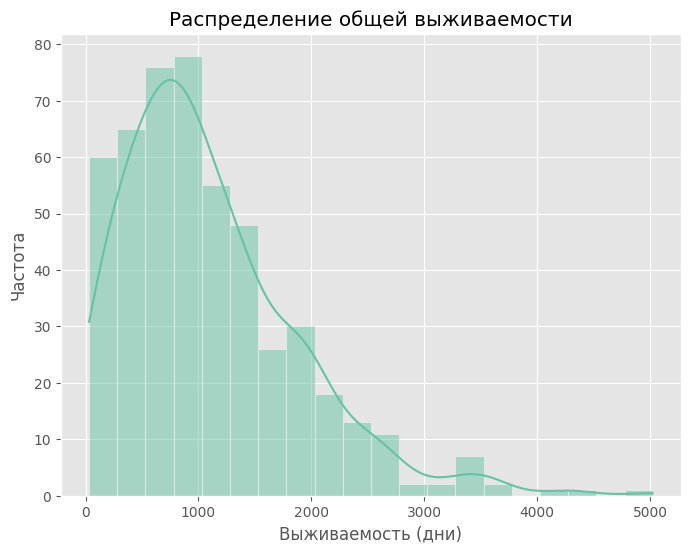

In [63]:
# 9.3. Гистограмма выживаемости
if 'overall_survival' in df.columns and df['overall_survival'].notna().sum() > 0:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['overall_survival'].dropna(), bins=20, kde=True) if 'sns' in globals() else plt.hist(df['overall_survival'].dropna(), bins=20)
    plt.title('Распределение общей выживаемости')
    plt.xlabel('Выживаемость (дни)')
    plt.ylabel('Частота')
    plt.show()
    plt.close()
else:
    print("Пропуск гистограммы выживаемости: столбец 'overall_survival' отсутствует или пустой")

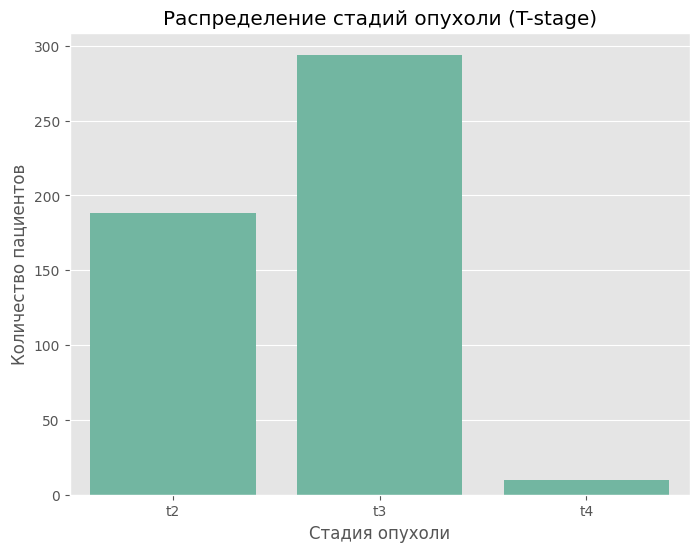

In [64]:
# 9.4. Столбчатая диаграмма для pathology_T_stage
if 'pathology_T_stage' in df.columns and df['pathology_T_stage'].notna().sum() > 0:
    plt.figure(figsize=(8, 6))
    try:
        sns.countplot(x='pathology_T_stage', data=df, order=['t2', 't3', 't4']) if 'sns' in globals() else df['pathology_T_stage'].value_counts().reindex(['t2', 't3', 't4']).plot(kind='bar')
        plt.title('Распределение стадий опухоли (T-stage)')
        plt.xlabel('Стадия опухоли')
        plt.ylabel('Количество пациентов')
        plt.show()
    except Exception as e:
        print(f"Ошибка при создании графика pathology_T_stage: {e}")
    plt.close()
else:
    print("Пропуск графика pathology_T_stage: столбец отсутствует или пустой")

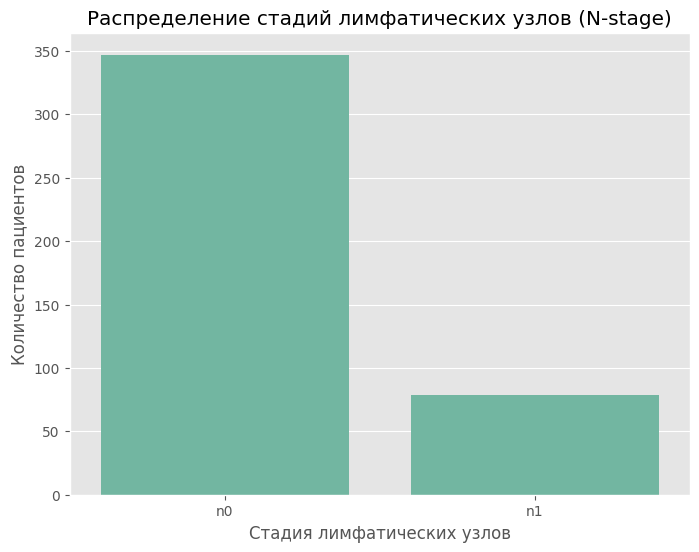

In [65]:
# 9.5. Столбчатая диаграмма для pathology_N_stage
if 'pathology_N_stage' in df.columns and df['pathology_N_stage'].notna().sum() > 0:
    plt.figure(figsize=(8, 6))
    try:
        sns.countplot(x='pathology_N_stage', data=df, order=['n0', 'n1']) if 'sns' in globals() else df['pathology_N_stage'].value_counts().reindex(['n0', 'n1']).plot(kind='bar')
        plt.title('Распределение стадий лимфатических узлов (N-stage)')
        plt.xlabel('Стадия лимфатических узлов')
        plt.ylabel('Количество пациентов')
        plt.show()
    except Exception as e:
        print(f"Ошибка при создании графика pathology_N_stage: {e}")
    plt.close()
else:
    print("Пропуск графика pathology_N_stage: столбец отсутствует или пустой")

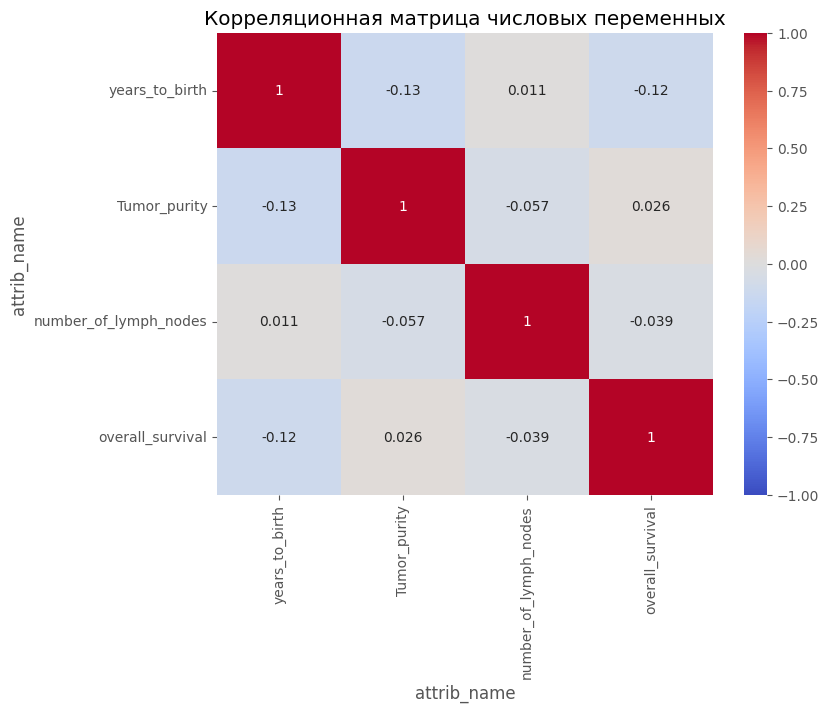

In [66]:
# 9.6. Корреляционная матрица числовых переменных
available_numeric_cols = [col for col in ['years_to_birth', 'Tumor_purity', 'number_of_lymph_nodes', 'overall_survival'] if col in df.columns]
if available_numeric_cols and df[available_numeric_cols].notna().sum().min() > 0:
    plt.figure(figsize=(8, 6))
    corr_matrix = df[available_numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) if 'sns' in globals() else plt.matshow(corr_matrix, cmap='coolwarm')
    plt.title('Корреляционная матрица числовых переменных')
    plt.show()
    plt.close()
else:
    print("Пропуск корреляционной матрицы: числовые столбцы отсутствуют или пустые")

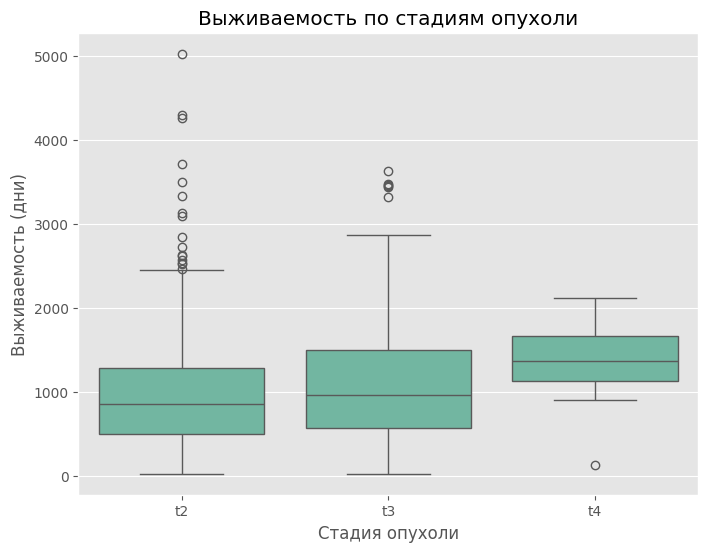


Визуализации завершены! Все графики отображены.


In [70]:
# 9.7. Boxplot выживаемости по T-stage
if 'pathology_T_stage' in df.columns and 'overall_survival' in df.columns and df[['pathology_T_stage', 'overall_survival']].notna().sum().min() > 0:
    plt.figure(figsize=(8, 6))
    try:
        sns.boxplot(x='pathology_T_stage', y='overall_survival', data=df, order=['t2', 't3', 't4']) if 'sns' in globals() else df.boxplot(column='overall_survival', by='pathology_T_stage')
        plt.title('Выживаемость по стадиям опухоли')
        plt.xlabel('Стадия опухоли')
        plt.ylabel('Выживаемость (дни)')
        plt.show()
    except Exception as e:
        print(f"Ошибка при создании boxplot: {e}")
    plt.close()
else:
    print("Пропуск boxplot: столбцы 'pathology_T_stage' или 'overall_survival' отсутствуют или пустые")

print("\nВизуализации завершены! Все графики отображены.")

In [78]:
# Сохранение обработанного датасета в CSV
df.to_csv('processed_clinical.csv', index=False)
print("Обработанный датасет сохранён в 'processed_clinical.csv'")

Обработанный датасет сохранён в 'processed_clinical.csv'
